# **Problem Statement**  
## **19. Use XGBoost to solve a classification problem and interpret feature importance.**

Build a classification model using XGBoost, evaluate its performance, and interpret feature importance to understand which features contribute most to predictions.

### Constraints & Example Inputs/Outputs

### Constraints
- Use XGBoost (xgboost library)
- Classification task
- Proper train–test split
- Interpret feature importance
- No AutoML

### Example Input:
```python
Dataset: Binary classification dataset
Features: 5 numerical features
Target: 0 or 1

```

### Expected Output:
```python
Accuracy: ~0.90+
Feature Importance Plot
Top contributing features identified

```

### Solution Approach

### What is XGBoost?
XGBoost (Extreme Gradient Boosting):
- Ensemble of decision trees
- Trains trees sequentially
- Each tree corrects previous errors
- Regularized → avoids overfitting

### What is Feature Importance?
XGBoost measures importance based on:
- Weight → how often a feature is used
- Gain → improvement brought by a feature
- Cover → number of samples affected

We’ll focus on Gain (most informative).

### High Level Workflow
1. Load data
2. Train-test split
3. Train XGBoost classifier
4. Evaluate model
5. Extract feature importance
6. Test predictions

### Solution Code

In [3]:
# Step 1: Install & Import Libraries

# If not installed
!pip install xgboost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 31.3 MB/s  0:00:03 eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 20.9 MB/s  0:00:14 eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]━━━ 1/2 [xgboost]


In [4]:
#Step 2: Create Dataset

X, y = make_classification(
    n_samples=1000,
    n_features=5,
    n_informative=3,
    random_state=42
)

feature_names = [f"feature_{i}" for i in range(X.shape[1])]
X = pd.DataFrame(X, columns=feature_names)
y = pd.Series(y)


In [5]:
#Step 3: Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
# Approach 1: Brute Force XGBoost Model (Minimal Tuning)

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42,
    eval_metric="logloss"
)

xgb_model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [8]:
#Step 4: Model Evaluation

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.955

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        94
           1       0.94      0.97      0.96       106

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



### Alternative Solution

In [9]:
# Approach 2: Optimized Model (Bettrer Hyperparameters)

optimized_model = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)

optimized_model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [10]:
opt_preds = optimized_model.predict(X_test)
opt_accuracy = accuracy_score(y_test, opt_preds)

print("Optimized Accuracy:", opt_accuracy)


Optimized Accuracy: 0.955


### Feature Imporatnce Interpretation

In [11]:
# Built-in Feature Importance (Gain)

importance = optimized_model.feature_importances_

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

importance_df


,Feature,Importance
1,feature_1,0.580122
0,feature_0,0.134276
3,feature_3,0.118001
4,feature_4,0.085559
2,feature_2,0.082043


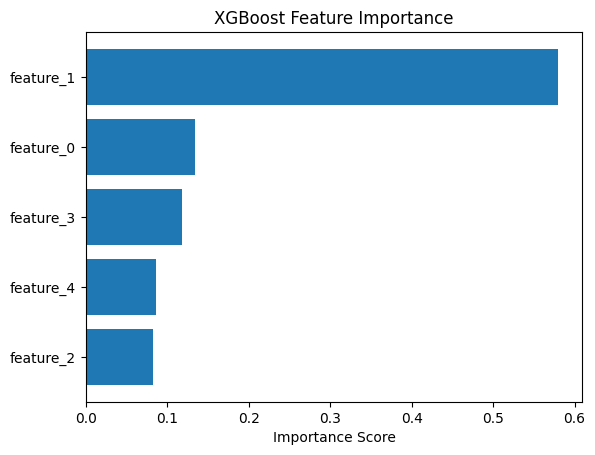

In [12]:
# Feature Importance Plot

plt.figure()
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importance Score")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()


### Alternative Approaches

**Brute Force**
- Default XGBoost parameters
- Fast baseline
- Minimal tuning

**Optimized**
- Manual hyperparameter tuning
- Subsampling
- Lower learning rate

**Advanced**
- SHAP values (local + global explainability)
- Permutation importance
- Cross-validation tuning

### Test Case

In [13]:
# Test Case 1: Model Trained Successfully

assert optimized_model is not None
print("Test Case 1 Passed: Model exists")


Test Case 1 Passed: Model exists


In [21]:
# Test Case 2: Accuracy Threshold Check

assert opt_accuracy > 0.95
print("Test Case 2 Passed: Accuracy acceptable")


Test Case 2 Passed: Accuracy acceptable


In [22]:
# Test Case 3: Feature Importance Integrity

assert importance_df["Importance"].sum() > 0
print("Test Case 3 Passed: Feature importance computed")


Test Case 3 Passed: Feature importance computed


In [23]:
# Test Case 4: Single Sample Prediction

sample = X_test.iloc[0:1]
prediction = optimized_model.predict(sample)

print("Sample Prediction:", prediction)


Sample Prediction: [0]


## Complexity Analysis

Let:
- T = number of trees
- D = tree depth
- N = samples

**Time Complexity**

O(T × N × log N)

**Space Complexity**

O(T × nodes_per_tree)

#### Thank You!!